<a href="https://colab.research.google.com/github/Telephos/RealTimeHistograms/blob/main/Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Image Handling 


The purpose of this notebook is to provide basic information on image handling and how to create a histogram for images. A histogram provides information about the pixel value distribution in an image. For grey-scale images, the number of pixels is equal to the dimension of the image, but histograms can also be created for RGB images, where there are 3 channels for each pixel. 

First, we can familiarize ourselves with the working environment. 

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


We've placed our image in the same directory as the notebook. Below we verify the filenames and image format.

In [ ]:
%cd /content/MyDrive/MyDrive/Colab Notebooks/AdvCV_Assignment1

/content/MyDrive/MyDrive/Colab Notebooks/AdvCV_Assignment1


In [ ]:
!ls

 Assignment1.ipynb	    lab1-2_vid.mp4   plot_video_resize.mp4
'Assignment 1 report.pdf'   plot1.jpeg	     rt_img.jpeg
 dog.bmp		    plot2.jpeg	     rt_original.jpeg
 exFrame250.PNG		    plots	     south_L-150x150.png
 exFrame48.PNG		    plot_video.mp4   values.txt


For reading and opening images, there are several options. Scikit-image provides a common method to open .bmp and .png images. Pillow is fork of the Python Imaging Library that also provides extensive image handling options. 

Below we import the libraries we intend to use. Along with Scikit-image and Pillow we import Matplotlib for vizualizing our images. Numpy will be used for array manipulation. 

In [ ]:
import numpy as np
#import pandas as pd
import cv2 
from skimage import io
from skimage.transform import rescale, resize
from PIL import Image
#import matplotlib.pylab as plt
from matplotlib import pyplot 
#from IPython.display import Image

Below we open the images using Pillow and display with Matplotlib.

In [ ]:
from skimage import io

im1_pil = io.imread('dog.bmp')
im2_pil = io.imread("south_L-150x150.png")

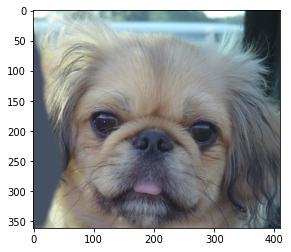

In [ ]:
import matplotlib.pylab as plt

plt.imshow(im1_pil)

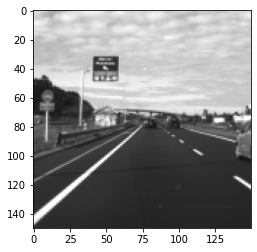

In [ ]:
import matplotlib.pylab as plt

plt.imshow(im2_pil)

Alternately, we could use Scikit-image to handle the files. Note that each library may import the image differently and not all libraries may be compatible with each other. 

In [ ]:
from PIL import Image

im1_ski = Image.open('dog.bmp')
im2_ski = Image.open('south_L-150x150.png')

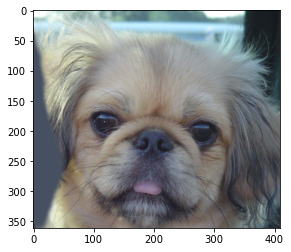

In [ ]:
from matplotlib import pyplot 

plt.imshow(im1_ski)

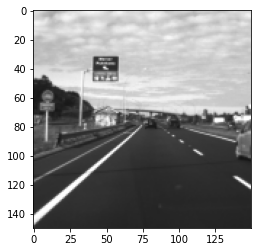

In [ ]:
from matplotlib import pyplot 

plt.imshow(im2_ski)

We can explore some features of the images like the number of bits and X and Y axis length

In [ ]:
from PIL import Image

print("Type: " + str(im1_pil.dtype))
print("X-axis: " + str(im1_pil.shape[0]))
print("Y-axis: " + str(im1_pil.shape[1]))

Type: uint8
X-axis: 361
Y-axis: 410


In [ ]:
#Uncomment import line 
#from PIL import Image

print("Type: " + str(im2_pil.dtype))
print("X-axis: " + str(im2_pil.shape[0]))
print("Y-axis: " + str(im2_pil.shape[1]))

Type: uint8
X-axis: 150
Y-axis: 150


Matplotlib allows us to create figures of our histogram. The hist() function here is called along with the numpy function flatten() which returns a copy of the image array collapsed into one dimension. The pixel values then are just placed into the respective bins in the histogram. After that we save the plot as image files.

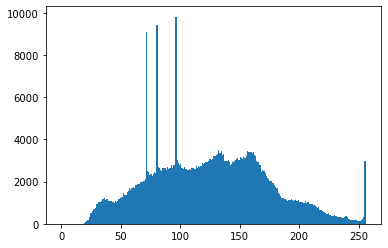

In [ ]:
plot1 = plt.hist(im1_pil.flatten(), bins = 256, range = [0,256])
fig1 = plt.gcf()
fig1.savefig('plot1.jpeg')

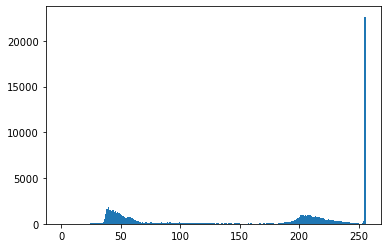

In [ ]:
plot2 = plt.hist(im2_pil.flatten(), bins = 256, range = [0,256])
fig2 = plt.gcf()
fig2.savefig('plot2.jpeg')

A user from github provided a few useful quick, useful functions for concatenating images.
https://note.nkmk.me/en/python-pillow-concat-images/

In [ ]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [ ]:
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

We open the plot using Pillow since it will import image properties for us.

In [ ]:
plot1_im = Image.open('plot1.jpeg')
plot2_im = Image.open('plot2.jpeg')

Then we can plot the image and histogram together.

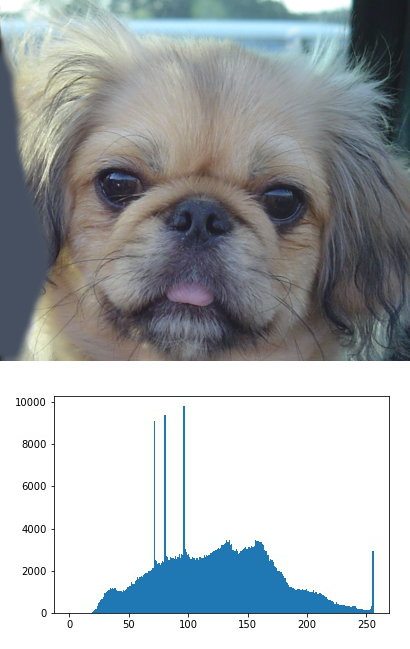

In [ ]:
get_concat_v(im1_ski, plot1_im)

We resize the second image, maintaining the aspect ratio.

In [ ]:
im1_resized = im2_ski.resize((400,400), Image.ANTIALIAS)

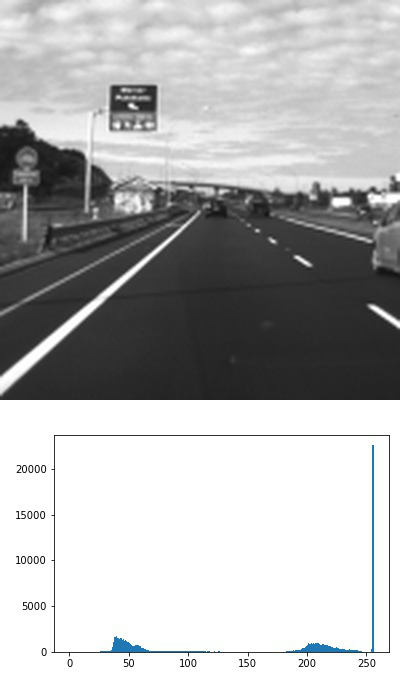

In [ ]:
get_concat_v(im1_resized, plot2_im)

Below we are just doing a few more things to show the images and histograms together.

In [ ]:
c1 = get_concat_v(im1_ski, plot1_im)
c2 = get_concat_v(im1_resized, plot2_im)

We modify the previous function to maintain the aspect ratios.

In [ ]:
def get_concat_h_mod(im1, im2):
    dst = Image.new('RGB', (810, 680))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

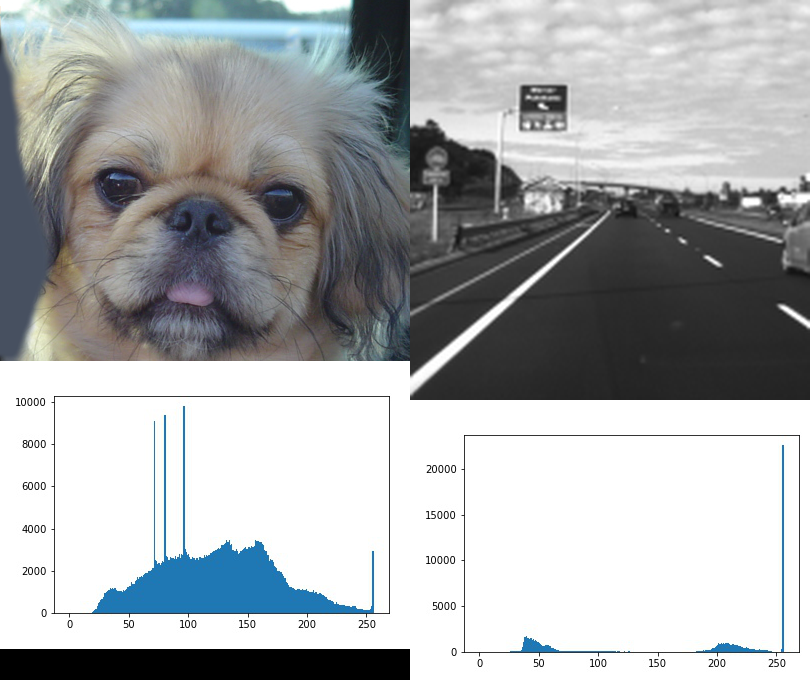

In [ ]:
get_concat_h_mod(c1, c2)

Data Carpentry also provided an excellent example of creating histograms that can seperate the color channels of the image. 
https://datacarpentry.org/image-processing/05-creating-histograms/

Text(0, 0.5, 'Pixel count')

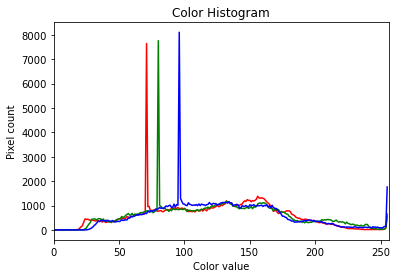

In [ ]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im1_pil[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

Text(0, 0.5, 'Pixel count')

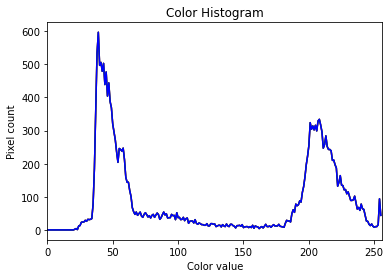

In [ ]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        im2_pil[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

###Video Handling

We can generate a histogram plot of our video in real time using the script below. Credit to Stackoverflow user Louis Jose. Cell output below removed for brevity.

https://stackoverflow.com/questions/38636520/histogram-of-my-cam-in-real-time

The script below simply checks the number of frames in our video.

In [ ]:
#Getting number of frames and dimensions
import cv2 as cv2

cap = cv2.VideoCapture('lab1-2_vid.mp4')

if cap.isOpened():
    
    frames_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Number of frames: ' + str(frames_num))

Number of frames: 399


The script below is modified from the GeekForGeeks article. The script generates the frames of the plots and saves them sequentially in a folder as jpeg images.

https://www.geeksforgeeks.org/python-create-video-using-multiple-images-using-opencv/

In [ ]:
import cv2 
from matplotlib import pyplot as plt

vid = cv2.VideoCapture('lab1-2_vid.mp4')

if (vid.isOpened()==False):
       print("Error opening video stream or file")
       
itr = 1

while(vid.isOpened()):
    #Capture frame by frame
    ret, frame = vid.read()
    if ret == True:
    
        cv2.imshow('Frame', frame)
        plt.title("Frame: " + str(itr))
        plt.xlabel("Intensity Value")
        plt.ylabel("Count")
        plt.axis([0,256,0,22000])
        plt.hist(frame.flatten(), 256, [0, 256])
        vid_plot = plt.gcf()
        vid_plot.savefig('plots/vid_plot%d.jpeg' %itr)
        plt.draw()
        #plt.pause(0.01)
        plt.clf()
        
        itr += 1
    
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    
    else:
        break
    
vid.release()
    
cv2.destroyAllWindows()

<Figure size 432x288 with 0 Axes>

Here we are simply getting some information from our generated plots which will we helpful once we render it into a video.

In [ ]:
import os
from PIL import Image

#C:\Users\deoli\AdvCV-CAP5410\Assignment 1\plots
os.chdir('C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1\\plots')
path = os.getcwd()
os.chdir(path)
         
mean_height = 0
mean_width = 0

num_of_images = len(os.listdir('.'))
print("Number of images: " + str(num_of_images))

for file in os.listdir('.'):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
    #im.show() # uncomment this for displaying the image
  
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

print("Mean width: " + str(mean_width))
print("Mean height: " + str(mean_height))

Number of images: 399
Mean width: 432
Mean height: 288


The script below generates a video from the images we previously generated. Credit to GeeksForGeeks.

https://www.geeksforgeeks.org/python-create-video-using-multiple-images-using-opencv/

In [ ]:
from natsort import os_sorted

os.chdir('C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1')

def generate_video():
    #image_folder = str(path) # make sure to use your folder
    image_folder = 'C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1\\plots'
    video_name = 'plot_video.mp4'
    #os.chdir("C:\\Python\\Geekfolder2")
    
    #listdir is in arbitrary order. I need sequential order.
    #os_sorted maintains os listing
    images = [img for img in os_sorted(os.listdir(image_folder))
        if img.endswith(".jpg") or
            img.endswith(".jpeg") or
            img.endswith("png")]

    # Array images should only consider
    # the image files ignoring others if any
    #print(images)

    frame = cv2.imread(os.path.join(image_folder, images[0]))

    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 50, (width, height))

    # Appending the images to the video one by one
    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    # Deallocating memories taken for window creation
    cv2.destroyAllWindows()
    video.release() # releasing the video generated


# Calling the generate_video function
generate_video()

The script below rescales video of the plots to match that of the original video we analyzed. This will be necessary for when we concatenate the video of the histogram and original video.

https://theailearner.com/2018/11/15/changing-video-resolution-using-opencv-python/

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('plot_video.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('plot_video_resize.mp4',fourcc, 50, (480,360))

while True:
    ret, frame = cap.read()
    if ret == True:
        b = cv2.resize(frame,(480,360),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        out.write(b)
    else:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

The script below is modified from a response in the opencv forum. We're generating 4 captures (2 for the original video, 2 for the histogram plot video) and concatenating them together so the original video is show side by side with the histogram plots below. 

https://answers.opencv.org/question/200077/combine-several-videos-in-the-same-window-python/

In [ ]:
import cv2
import numpy as np
import time

cap = cv2.VideoCapture('lab1-2_vid.mp4',0)
cap1 = cv2.VideoCapture('lab1-2_vid.mp4',0)
cap2 = cv2.VideoCapture('plot_video_resize.mp4',0)
cap3 = cv2.VideoCapture('plot_video_resize.mp4',0)

while(cap.isOpened()):

    ret, frame = cap.read()
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    ret3, frame3 = cap3.read()
    
    time.sleep(0.05)
    if ret == True: 

        both = np.concatenate((frame, frame1), axis=1)
        both2 = np.concatenate((frame2, frame3), axis=1)
        
        final = np.concatenate((both, both2), axis=0)

        cv2.imshow('Frame', final)
        #out.write(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    else: 
        break

cap.release()
#out.release()

cv2.waitKey(0)
cv2.destroyAllWindows()

A few example frames of the output from the script above are shown below

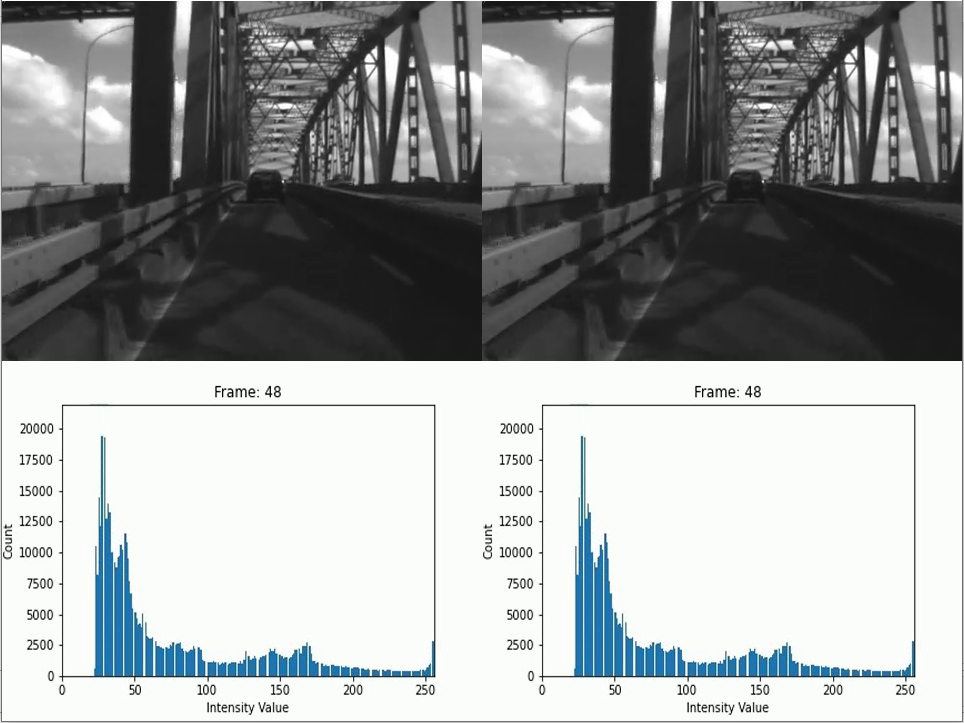

In [ ]:
os.chdir("C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1")
Image.open('exFrame48.PNG')

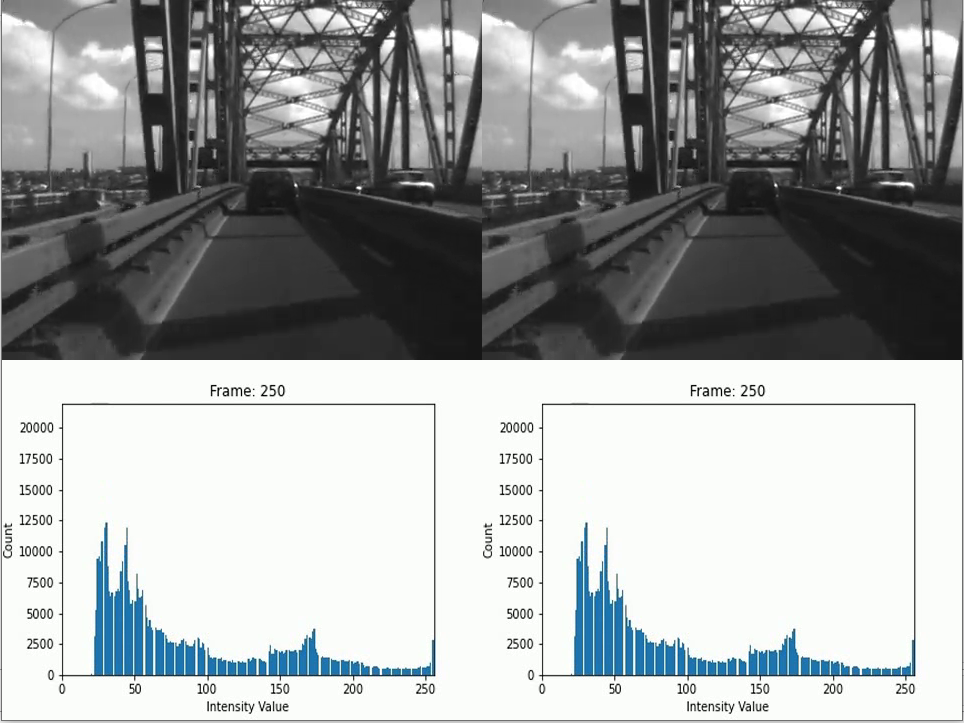

In [ ]:
os.chdir("C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1")
Image.open('exFrame250.PNG')

# NEEDS ONLY VIDEO FILE AND CHANGES TO PATH.

https://www.geeksforgeeks.org/changing-the-contrast-and-brightness-of-an-image-using-python-opencv/

In [ ]:
import cv2
import numpy as np
import csv
from matplotlib import pyplot as plt

def BrightnessContrast(brightness=0):
    # getTrackbarPos returns the current
    # position of the specified trackbar.
    brightness = cv2.getTrackbarPos('Brightness', 'MAIN')
    contrast = cv2.getTrackbarPos('Contrast', 'MAIN')
    
    # Applies effects to the image
    effect = controller(img, brightness, contrast)
    
    #The real time plots
    rt_plot1 = plt.hist(original.flatten(), bins = 256, range = [0,256])
    
    #Keeping axes the same
    plt.xlabel("Intensity Value")
    plt.ylabel("Count")
    plt.axis([0,256,0,22000])
    
    #Get current plot
    fig1 = plt.gcf()
    #Save current plot
    fig1.savefig('rt_original.jpeg')
    #Clear plot
    fig1 = plt.clf()
    #Repeat with affected image
    rt_plot1 = plt.hist(effect.flatten(), bins = 256, range = [0,256])
    
    #Keeping axes the same
    plt.xlabel("Intensity Value")
    plt.ylabel("Count")
    plt.axis([0,256,0,22000])
    
    fig1 = plt.gcf()
    fig1.savefig('rt_img.jpeg')
    fig1 = plt.clf()
    
    #Concatenate videos together
    videos_frame = np.concatenate((original, effect), axis=1)
    
    #Read images back from folder
    #CHANGE THE PATH TO THE FOLDER IN WHICH YOU HAVE THE IMAGES
    ori_plot = cv2.imread('C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1\\rt_original.jpeg')
    eff_plot = cv2.imread('C:\\Users\\deoli\\AdvCV-CAP5410\\Assignment 1\\rt_img.jpeg')
    
    #Resize plot images so they can be concatenated with videos
    ori_plot_re = cv2.resize(ori_plot, (480,360), interpolation = cv2.INTER_AREA)
    eff_plot_re = cv2.resize(eff_plot, (480,360), interpolation = cv2.INTER_AREA)

    #Stitch plots together side by side
    plot_frame = np.concatenate((ori_plot_re, eff_plot_re), axis=1)
    #Stitch plots and videos one below the other.
    complete_frame = np.concatenate((videos_frame, plot_frame), axis=0)

    cv2.imshow('MAIN', complete_frame)
    #videos_frame = np.concatenate((original, img), axis=1)

def controller(img, brightness=255, contrast=127):

    brightness = int((brightness - 0) * (255 - (-255)) / (510 - 0) + (-255))
    contrast = int((contrast - 0) * (127 - (-127)) / (254 - 0) + (-127))
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            max = 255

        else:
            shadow = 0
            max = 255 + brightness

        al_pha = (max - shadow) / 255
        ga_mma = shadow

        # The function addWeighted calculates
        # the weighted sum of two arrays
        cal = cv2.addWeighted(img, al_pha, img, 0, ga_mma)

    else:
        cal = img

    if contrast != 0:
        Alpha = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        Gamma = 127 * (1 - Alpha)

        # The function addWeighted calculates
        # the weighted sum of two arrays
        cal = cv2.addWeighted(cal, Alpha, cal, 0, Gamma)

    # putText renders the specified text sparatring in the image.
    #cv2.putText(cal, 'B:{},C:{}'.format(brightness, contrast), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    return cal

cap = cv2.VideoCapture('lab1-2_vid.mp4', 0)
cap1 = cv2.VideoCapture('lab1-2_vid.mp4',0)

run_once = 0

while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    ret1, frame1 = cap1.read()
    
    #original = cv2.imread(frame)
    original = frame
    
    #This one will have contrast/brightness adjust
    img = frame1
    
    cv2.namedWindow('MAIN')
    
    if ret:
        pass
    else:
        print('Looped')
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        cap1.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
    if run_once == 0:  
        #Opening the text file with our values and inserting them into the starting values of the trackbar
        with open('values.txt') as csvfile:
            csvReader = csv.reader(csvfile, delimiter=',')
            for row in csvReader:
                b1 = int(row[0]) 
                c1 = int(row[1])
                    
        #Only want to create trackbars once
        cv2.createTrackbar('Brightness','MAIN', b1, 2 * 255, BrightnessContrast)
        cv2.createTrackbar('Contrast', 'MAIN', c1, 2 * 127, BrightnessContrast)
        #Opening the text file with our values and in
    
    BrightnessContrast(0)
    run_once = 1 
    
    #Press 'q' to close screen
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    #Press 's' to save contrast and brightness settings
    if cv2.waitKey(2) & 0xFF == ord('s'):
        f = open("values.txt", "w")
        b1 = cv2.getTrackbarPos('Brightness', 'MAIN')
        c1 = cv2.getTrackbarPos('Contrast', 'MAIN')
        f.write(str(b1)+","+str(c1))
        f.close()
        
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


<Figure size 432x288 with 0 Axes>